In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/ismaelcisse/Desktop/Tech Challenge/TechChallengeData.csv")

In [3]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,gas_consumed,amount
0,28.0,5.0,26,21.5,12,E10,0,0,0,1.4000,2.01
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.5040,0.73
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.6160,0.89
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.5031,0.72
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.8325,1.20


In [4]:
corr_matrix = data.corr()

In [5]:
corr_matrix

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_consumed,amount
distance,1.000000,-0.128967,0.562299,0.077636,0.088175,-0.025738,-0.019791,0.081120,0.992101,0.982391
consume,-0.128967,1.000000,-0.227866,-0.154953,-0.320811,0.096591,0.248118,-0.170667,-0.052188,-0.051175
speed,0.562299,-0.227866,1.000000,0.060039,0.015411,-0.035408,0.009489,0.081618,0.551847,0.529931
temp_inside,0.077636,-0.154953,0.060039,1.000000,0.357431,0.300407,-0.035199,0.241530,0.065359,0.062871
temp_outside,0.088175,-0.320811,0.015411,0.357431,1.000000,0.167562,-0.186315,0.346903,0.037877,0.046300
AC,-0.025738,0.096591,-0.035408,0.300407,0.167562,1.000000,0.242915,0.088598,-0.018700,-0.013715
rain,-0.019791,0.248118,0.009489,-0.035199,-0.186315,0.242915,1.000000,-0.112650,0.009125,0.017545
sun,0.081120,-0.170667,0.081618,0.241530,0.346903,0.088598,-0.112650,1.000000,0.064247,0.069228
gas_consumed,0.992101,-0.052188,0.551847,0.065359,0.037877,-0.018700,0.009125,0.064247,1.000000,0.992720
amount,0.982391,-0.051175,0.529931,0.062871,0.046300,-0.013715,0.017545,0.069228,0.992720,1.000000


/var/folders/fp/nkvz8km55ybd4yzr2wcb2pjr0000gn/T/ipykernel_41666/1099885487.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


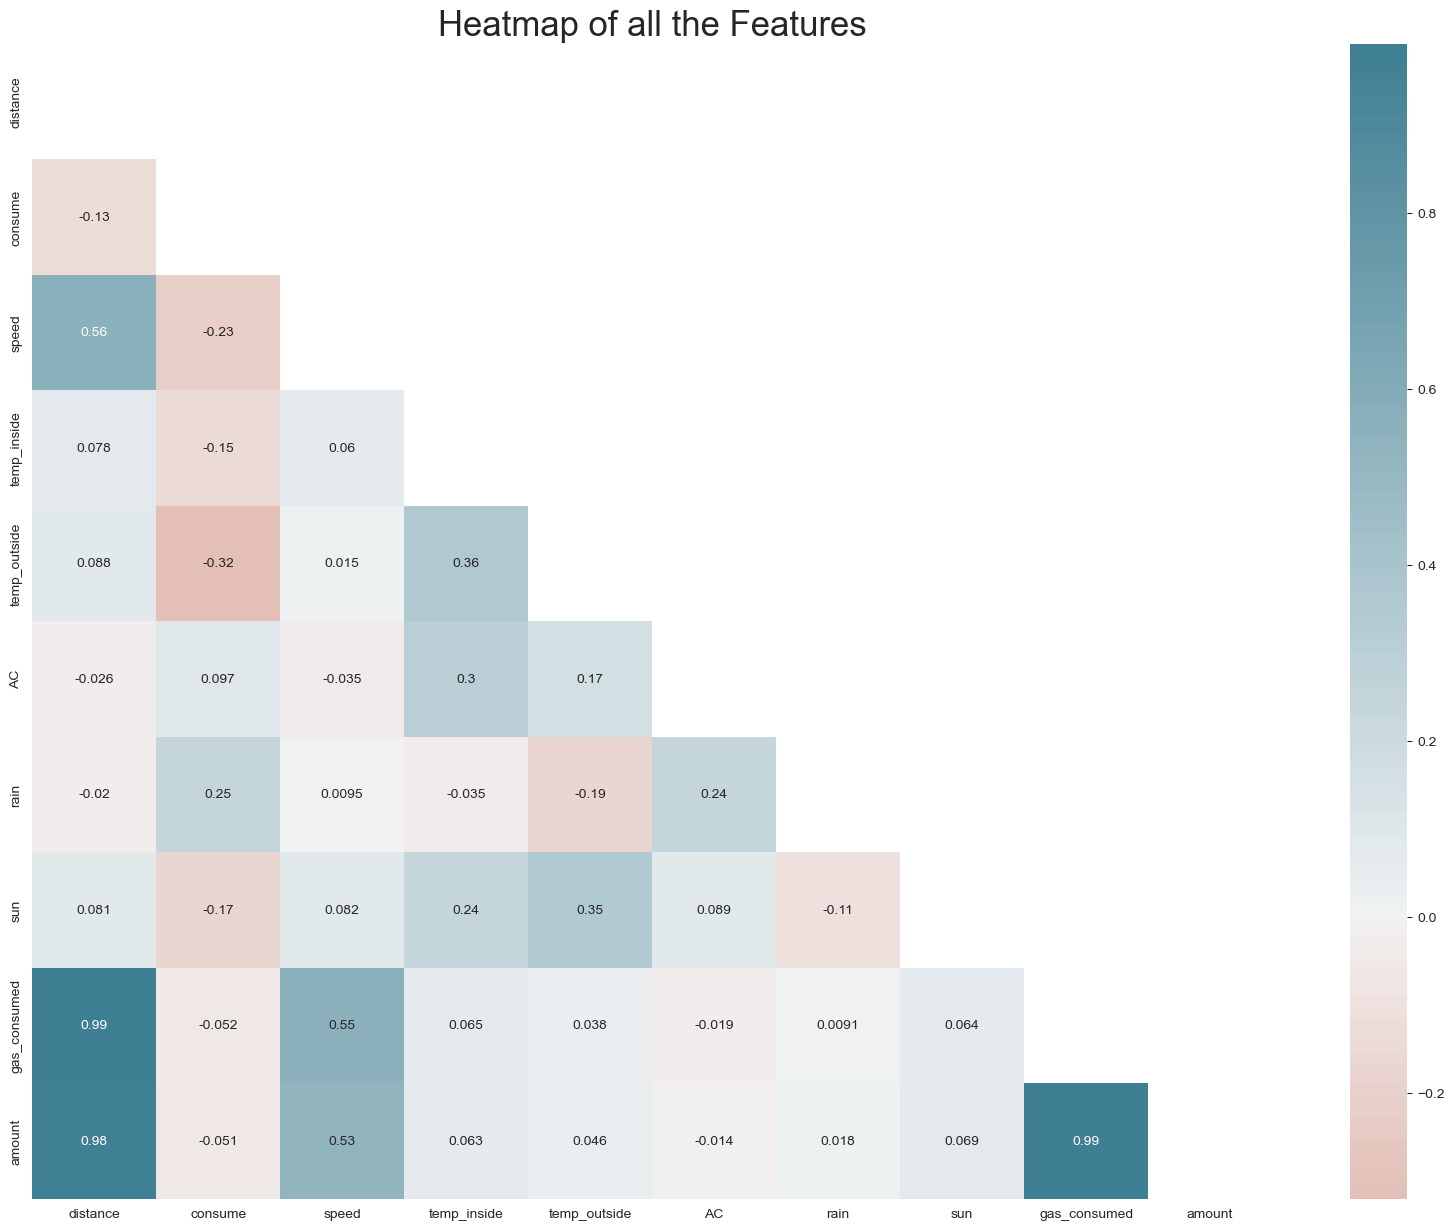

In [6]:
import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (20,15))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );

plt.title("Heatmap of all the Features", fontsize = 25);

In [7]:
#Huge correlation on gas_consumed, amount columns
#We will drop them

In [8]:
columntodrop = ["gas_consumed","amount"]

In [9]:
data = data.drop(columns=columntodrop,axis=1)

In [10]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [11]:
corr_matrix1 = data.corr()

/var/folders/fp/nkvz8km55ybd4yzr2wcb2pjr0000gn/T/ipykernel_41666/2498373921.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix1, dtype=np.bool)


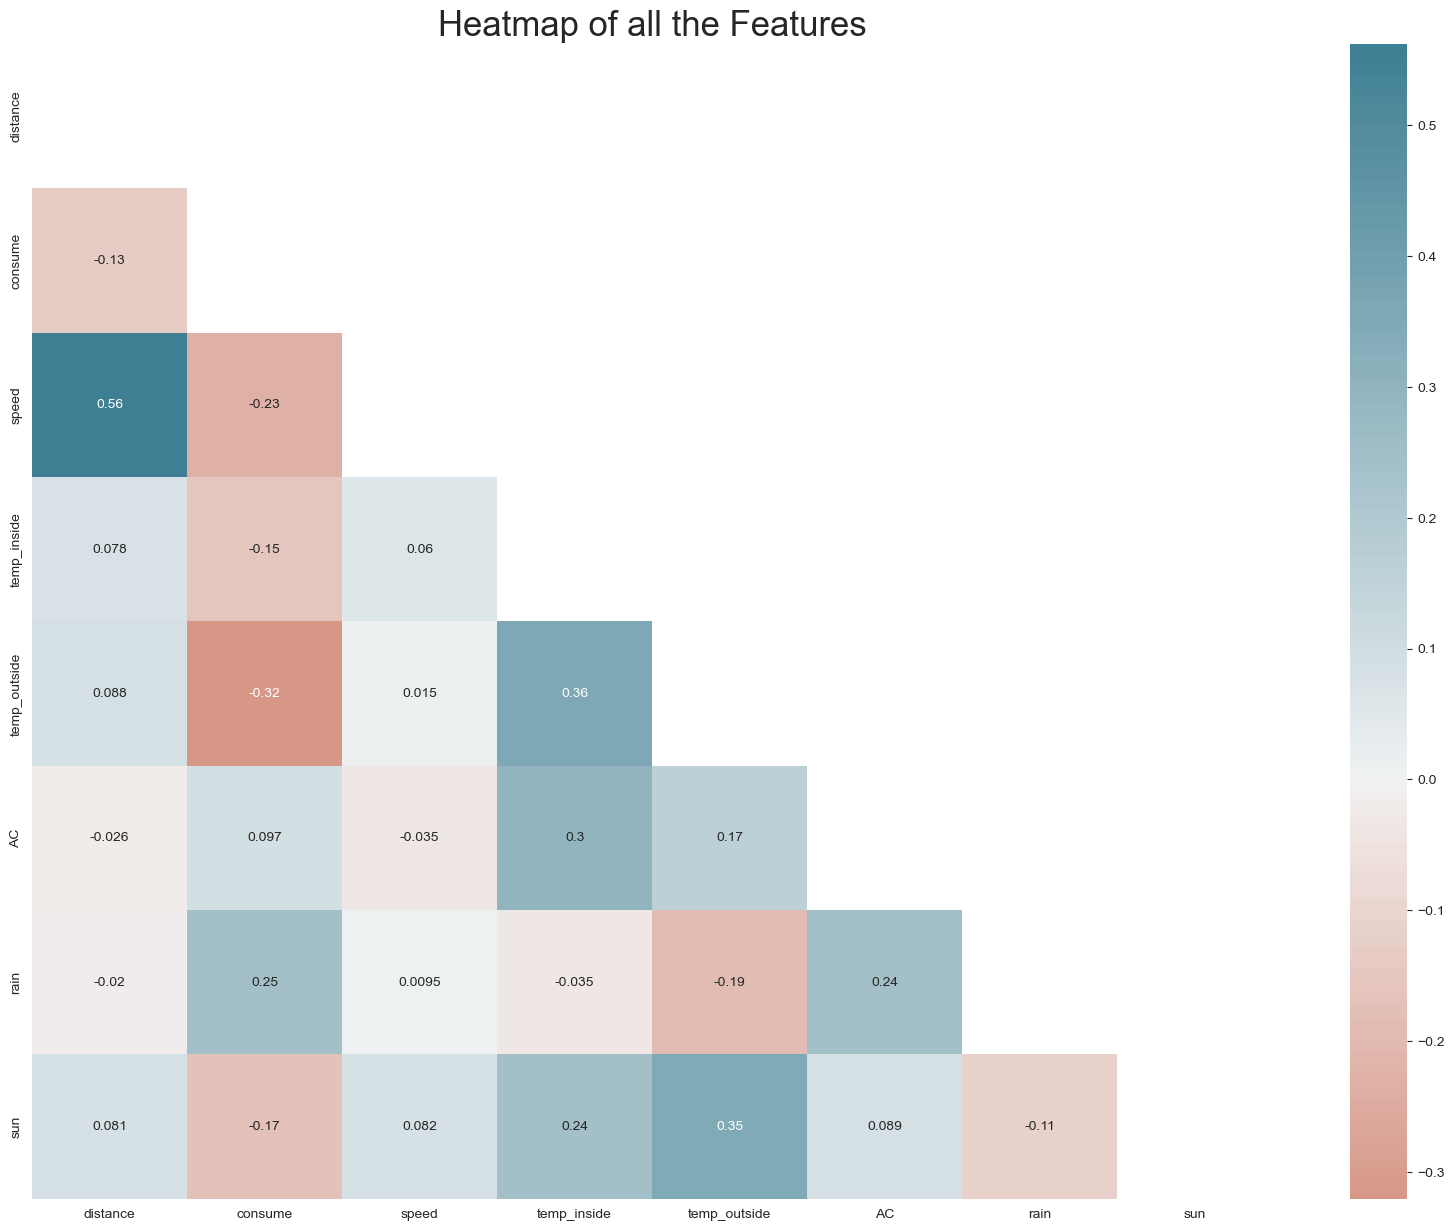

In [12]:
import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (20,15))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr_matrix1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix1, cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );

plt.title("Heatmap of all the Features", fontsize = 25);

In [13]:
#Reminder 
#Our goal :find the best combustible? Between E10 and SP98 in Barcelona

In [14]:
#Spliting part

In [15]:
X = data.drop('consume',axis=1) #We will try to predict the amount of gas consumed by gas
y = data['consume']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [18]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

In [19]:
transformer = MinMaxScaler().fit(X_train_num)

In [20]:
X_train_normalized = transformer.transform(X_train_num)

In [21]:
X_train_num_scale = pd.DataFrame(X_train_normalized, index = X_train_num.index, columns = X_train_num.columns)

In [22]:
X_train_num_scale

,distance,speed,temp_inside,temp_outside,AC,rain,sun
63,0.025605,0.157895,0.384615,0.305556,0.0,0.0,0.0
238,0.048883,0.342105,0.538462,0.194444,0.0,0.0,0.0
132,0.068901,0.250000,0.384615,0.305556,0.0,0.0,0.0
101,0.115922,0.750000,0.307692,0.361111,1.0,1.0,0.0
351,0.068436,0.421053,0.461538,0.611111,0.0,0.0,0.0
...,...,...,...,...,...,...,...
71,0.003259,0.078947,0.384615,0.416667,0.0,0.0,0.0
106,0.751397,0.802632,0.615385,0.166667,0.0,0.0,0.0
270,0.068436,0.355263,0.461538,0.472222,0.0,0.0,0.0
348,0.071229,0.473684,0.461538,0.833333,0.0,0.0,0.0


In [23]:
X_train_cat['gas_type']=np.where(X_train_cat['gas_type']=='E10',1,0)
X_train_cat['gas_type'].unique()

array([0, 1])

In [24]:
X_test_cat['gas_type']=np.where(X_test_cat['gas_type']=='E10',1,0)
X_test_cat['gas_type']

271    1
46     0
167    1
42     1
349    0
      ..
3      1
18     1
93     0
108    0
255    1
Name: gas_type, Length: 78, dtype: int64

In [25]:
#Times up 3H 